# Neural Networks

In [1]:
# Import libraries
from pandas import read_csv
import pandas as pd
from time import sleep
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot,concatenate, split, trace
from numpy.random import rand
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, imshow
from scipy.optimize import fmin_bfgs, fmin_cg
get_ipython().magic('matplotlib inline')
get_ipython().magic('pylab inline')
import scipy.io
from matplotlib.animation import FuncAnimation
from numpy.random import randint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import images
dataA = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex3data1.mat')
data = append(dataA['X'],dataA['y'],axis=1) 

x = dataA['X']
y = dataA['y']

In [3]:
# Checking the form of the arrays
print(x.shape)
print(y.shape)
print(y[randint(y.shape[0],size = 20)].T)

(5000, 400)
(5000, 1)
[[10  3 10  3  2  3  1  5  2  3  4  6 10  2  9  6  1 10  3  3]]


These are the 200 images that serve as the training set


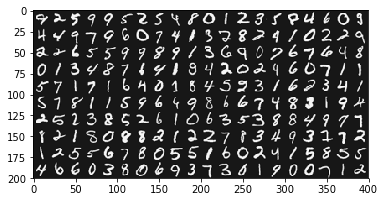

In [4]:
# Convert 200 images to gray scale 
def showNumbers(x):
    im_number = 200
    imv = empty((20,0))
    imag = []
    for i in range(im_number):
        im = reshape(x[i],(20,20)).T
        imv = append(imv,im,axis=1)
        if (i+1) % 20 == 0:
            imag.append(imv)
            imv = empty((20,0))
    image = concatenate((imag[:]),axis = 0)
    imshow(image, cmap = cm.Greys_r)

#Display 200 numbers randomly
shuffle(data)
showNumbers(data[:,:-1])
print('These are the 200 images that serve as the training set')

In [5]:
# Define functions
def sigmoid(z):
    return 1/(1+exp(-z))

def sigmoidGradient(z):
        return sigmoid(z)*(1-sigmoid(z))

def costFunction(theta,x,y, lamda=0):
    theta1, theta2 = split(theta,[25*401])
    theta1 = reshape(theta1,(25,401))
    theta2 = reshape(theta2,(10,26))
    
    m = x.shape[0]
    
    # Forward propagation
    a1 = append(ones((1,m)),x.T,axis=0)
    z2 = dot(theta1,a1)
    a2 = append(ones((1,m)),sigmoid(z2),axis=0)
    z3 = dot(theta2,a2)
    a3 = sigmoid(z3)
    
    Y = zeros((10,m))
    for i in range(m):
        Y[y[i]%10,i] = 1
    
    J = trace(-dot(Y.T,log(a3))-dot((1-Y.T),log(1-a3)))/m
    J += lamda*sum(square(theta1[:,1:]))/(2*m)+lamda*sum(square(theta2[:,1:]))/(2*m)
        
    return J

def gradientTheta(theta,x,y, lamda=0):
    theta1, theta2 = split(theta,[25*401])
    theta1 = reshape(theta1,(25,401))
    theta2 = reshape(theta2,(10,26))
    m = x.shape[0]
    a1 = append(ones((1,m)),x.T,axis=0)
    z2 = dot(theta1,a1)
    a2 = append(ones((1,m)),sigmoid(z2),axis=0)
    z3 = dot(theta2,a2)
    a3 = sigmoid(z3)
    
    Y = zeros((10,m))
    for i in range(m):
        Y[y[i]%10,i] = 1
        
    # Backward propagation
    delta3 = a3 - Y
    delta2a = dot(theta2.T,delta3)*sigmoidGradient(append(ones((1,m)),z2,axis=0))
    delta2 = delta2a[1:,:]
    theta1Grad = dot(delta2,a1.T)/m
    theta2Grad = dot(delta3,a2.T)/m
    #Regularization
    theta1Grad[:,1:] += lamda*sum(theta1[:,1:])/m  
    theta2Grad[:,1:] += lamda*sum(theta2[:,1:])/m 
    return append(theta1Grad.flatten(),theta2Grad.flatten())

def initializeTheta():
    eps = 0.1
    theta1 = rand(25,401)*2*eps-eps
    theta2 = rand(10,26)*2*eps-eps
    theta = append(theta1.flatten(),theta2.flatten())
    return theta

def predictions(theta,x):
    theta1, theta2 = split(theta,[25*401])
    theta1 = reshape(theta1,(25,401))
    theta2 = reshape(theta2,(10,26))
    m = x.shape[0]
    X = append(ones((m,1)),x,axis=1)
    h1 = sigmoid(dot(X,theta1.T))
    H1 = append(ones((m,1)),h1,axis=1)
    h2 = sigmoid(dot(H1,theta2.T))
    pred = argmax(h2,axis=1)
    return pred

def accuracy(pred,y):
    pred.shape = (pred.size,1)
    return sum(pred == y%10)/float(y.shape[0])*100

In [6]:
#initialize parameters
inTheta = initializeTheta()

lamda = 0.1
maxIterations = 30

theta = fmin_cg(costFunction,inTheta,fprime = gradientTheta,args=(x,y,lamda), maxiter = maxIterations,disp = 1)

         Current function value: 0.455137
         Iterations: 30
         Function evaluations: 67
         Gradient evaluations: 67


In [7]:
# calculate accuracy of the algorithm by cross-referencing it with y
pred = predictions(theta,x)
acc = accuracy(pred,y)

print('The algorithm predicts %f %% of the examples correclty' %acc)
# Increase accuracy
print('current maxiter = %d'%maxIterations)
# Or decrease lambda but beware of overfitting
print('currently lambda = %f'%lamda)

The algorithm predicts 94.140000 % of the examples correclty
current maxiter = 30
currently lambda = 0.100000


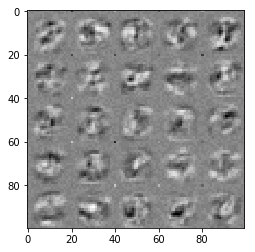

In [8]:
# Show activations
def showNumbers(theta):
    im_number = theta.shape[0]
    imv = empty((20,0))
    imag = []
    for i in range(im_number):
        im = reshape(theta[i,:-1],(20,20)).T
        imv = append(imv,im,axis=1)
        if (i+1) % 5 == 0:
            imag.append(imv)
            imv = empty((20,0))
    image = concatenate((imag[:]),axis = 0)
    imshow(image, cmap = cm.Greys_r)

theta1, theta2 = split(theta,[25*401])
theta1 = reshape(theta1,(25,401))
theta2 = reshape(theta2,(10,26))

showNumbers(theta1)

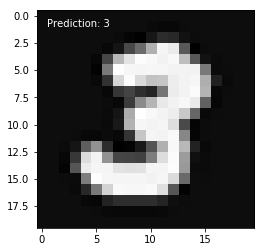

In [9]:
# Show animation
def arrayToImage(i):
    X = reshape(x[i],(20,20)).T
    return X

def animate(*args):
    i = randint(5000)
    im = ax.imshow(arrayToImage(i), cmap = 'gray')
    prediction.set_text('Prediction: %d'%pred[i])
    return im,prediction

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(arrayToImage(0), cmap = 'gray')
prediction = ax.text(.5, 1, '', color= 'white')

anim = FuncAnimation(fig, animate,interval = 1500)